## Name
Ogada Thomas Otiende

email: otiende.ogada@student.moringaschool.com

# Business Understanding
Customer churn, the phenomenon where customers cease doing business with a company, is a critical concern for telecommunications companies like SyriaTel. Retaining customers is essential for maintaining revenue and growth in this competitive industry. Identifying factors contributing to churn, such as service dissatisfaction or competitive offers, SyriaTel can take targeted actions to mitigate churn and improve customer retention.

### Introduction
This project aims to build a predictive model for SyriaTel, a telecommunications company, to identify customers at risk of churning.Accurately predicting customer churn, SyriaTel can proactively implement retention strategies, thereby reducing financial losses and enhancing customer loyalty.

### Background
Syria is a country located in the Middle East, has a telecommunications sector experiencing rapid growth in mobile and internet penetration. SyriaTel, as a key player in this sector, plays a vital role in connecting people and businesses. However, increasing competition and evolving customer preferences pose challenges for customer retention. Understanding and addressing the drivers of churn are crucial for SyriaTel to sustain business success and enhance customer satisfaction

### Business Problem

SyriaTel, a telecommunications company, faces the challenge of customer churn, where customers discontinue their services. This attrition impacts revenue and profitability. The business seeks to proactively identify customers at risk of churning and implement effective retention strategies to mitigate revenue loss and maintain customer loyalty.

Specifically, the project aims to address the following questions:

1.What are the primary factors driving customer churn for SyriaTel?

2.Which machine learning modelling technique to apply in accurately predicting Churn so as to take proactive measures?

3.What actionable insights can SyriaTel derive from the predictive model to improve customer retention efforts?

4.What strategies can SyriaTel put in place to reduce churn rate?

## Data Understanding

### Importing neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
from collections import Counter  
import calendar
from dateutil import relativedelta
import operator
import os
import random
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("C:\\Users\\User\\Documents\\Phase_3_Project\\SyriaTel_df.csv")
df = df.copy()

### Understanding the dataframe

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10000000000002274,110,45.07000000000000028,197.4000000000000057,99,16.7800000000000011,244.6999999999999886,91,11.009999999999999787,10.0,3,2.7000000000000002,1,False
1,OH,107,415,371-7191,no,yes,26,161.5999999999999943,123,27.46999999999999886,195.5,103,16.620000000000001,254.4000000000000057,103,11.4499999999999993,13.6999999999999993,3,3.7000000000000002,1,False
2,NJ,137,415,358-1921,no,no,0,243.4000000000000057,114,41.38000000000000256,121.20000000000000284,110,10.3000000000000007,162.5999999999999943,104,7.3200000000000003,12.1999999999999993,5,3.29000000000000004,0,False
3,OH,84,408,375-9999,yes,no,0,299.39999999999997726,71,50.8999999999999986,61.8999999999999986,88,5.2599999999999998,196.9000000000000057,89,8.8599999999999994,6.5999999999999996,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.6999999999999886,113,28.33999999999999986,148.30000000000001137,122,12.6099999999999994,186.9000000000000057,121,8.41000000000000014,10.09999999999999964,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.19999999999998863,77,26.5500000000000007,215.5,126,18.3200000000000003,279.10000000000002274,83,12.5600000000000005,9.9000000000000004,6,2.6699999999999999,2,False
3329,WV,68,415,370-3271,no,no,0,231.09999999999999432,57,39.28999999999999915,153.4000000000000057,55,13.03999999999999915,191.30000000000001137,123,8.6099999999999994,9.5999999999999996,4,2.5899999999999999,3,False
3330,RI,28,510,328-8230,no,no,0,180.8000000000000114,109,30.7399999999999984,288.8000000000000114,58,24.5500000000000007,191.9000000000000057,91,8.6400000000000006,14.09999999999999964,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8000000000000114,105,36.3500000000000014,159.5999999999999943,84,13.5700000000000003,139.19999999999998863,137,6.2599999999999998,5.0,10,1.3500000000000001,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4000000000000057,113,39.8500000000000014,265.8999999999999773,82,22.6000000000000014,241.4000000000000057,77,10.8599999999999994,13.6999999999999993,4,3.7000000000000002,0,False


In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.shape

(3333, 21)

#### Changing Columns into Title cases

In [7]:
df.columns = df.columns.str.title()
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone Number',
       'International Plan', 'Voice Mail Plan', 'Number Vmail Messages',
       'Total Day Minutes', 'Total Day Calls', 'Total Day Charge',
       'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge',
       'Total Night Minutes', 'Total Night Calls', 'Total Night Charge',
       'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge',
       'Customer Service Calls', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account Length          3333 non-null   int64  
 2   Area Code               3333 non-null   int64  
 3   Phone Number            3333 non-null   object 
 4   International Plan      3333 non-null   object 
 5   Voice Mail Plan         3333 non-null   object 
 6   Number Vmail Messages   3333 non-null   int64  
 7   Total Day Minutes       3333 non-null   float64
 8   Total Day Calls         3333 non-null   int64  
 9   Total Day Charge        3333 non-null   float64
 10  Total Eve Minutes       3333 non-null   float64
 11  Total Eve Calls         3333 non-null   int64  
 12  Total Eve Charge        3333 non-null   float64
 13  Total Night Minutes     3333 non-null   float64
 14  Total Night Calls       3333 non-null   

#### Identifying the type of columns

In [9]:
# Identifying columns
df['Churn'] = df['Churn'].astype(bool)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Removing 'Phone Number' from categorical columns if it exists
string_cols = ['Phone Number']
for col in string_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)

# Print the identified columns
print("Numerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)

print("\nString columns:")
print(string_cols)

Numerical columns:
['Account Length', 'Area Code', 'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls', 'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge', 'Customer Service Calls']

Categorical columns:
['State', 'International Plan', 'Voice Mail Plan', 'Churn']

String columns:
['Phone Number']


In [10]:
df.count()

State                     3333
Account Length            3333
Area Code                 3333
Phone Number              3333
International Plan        3333
Voice Mail Plan           3333
Number Vmail Messages     3333
Total Day Minutes         3333
Total Day Calls           3333
Total Day Charge          3333
Total Eve Minutes         3333
Total Eve Calls           3333
Total Eve Charge          3333
Total Night Minutes       3333
Total Night Calls         3333
Total Night Charge        3333
Total Intl Minutes        3333
Total Intl Calls          3333
Total Intl Charge         3333
Customer Service Calls    3333
Churn                     3333
dtype: int64

#### Checking for null values

In [11]:
df.isnull().sum()

State                     0
Account Length            0
Area Code                 0
Phone Number              0
International Plan        0
Voice Mail Plan           0
Number Vmail Messages     0
Total Day Minutes         0
Total Day Calls           0
Total Day Charge          0
Total Eve Minutes         0
Total Eve Calls           0
Total Eve Charge          0
Total Night Minutes       0
Total Night Calls         0
Total Night Charge        0
Total Intl Minutes        0
Total Intl Calls          0
Total Intl Charge         0
Customer Service Calls    0
Churn                     0
dtype: int64

#### Checking for duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
# function to identify unique values
for column in df.select_dtypes(include=['number']):
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    

Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
Unique values in column 'Area Code': [415 408 510]
Unique values in column 'Number Vmail Messages

#### Describing the dataframe

In [14]:
df.describe()

,Account Length,Area Code,Number Vmail Messages,Total Day Minutes,Total Day Calls,Total Day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total Intl Minutes,Total Intl Calls,Total Intl Charge,Customer Service Calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.06480648064805905,437.18241824182416622,8.0990099009900991,179.7750975097509354,100.4356435643564396,30.562307230723075,200.9803480348034839,100.11431143114310771,17.08354035403540294,200.8720372037203674,100.1077107710771088,9.03932493249324942,10.23729372937293824,4.4794479447944795,2.7645814581458144,1.5628562856285628
std,39.8221059285956045,42.3712904856066146,13.6883653720385983,54.46738920237137194,20.0690842073008966,9.2594345539305003,50.7138444258119989,19.9226252939431028,4.31066764311034056,50.5738470136583587,19.5686093460585582,2.275872837660029,2.791839548408416,2.461214270546094,0.753772612663046,1.3154910448664767
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.1999999999999993,33.0,1.040000000000000036,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,143.6999999999999886,87.0,24.4299999999999997,166.5999999999999943,87.0,14.16000000000000014,167.0,87.0,7.5199999999999996,8.5,3.0,2.2999999999999998,1.0
50%,101.0,415.0,0.0,179.4000000000000057,101.0,30.5,201.4000000000000057,100.0,17.120000000000001,201.19999999999998863,100.0,9.05000000000000071,10.3000000000000007,4.0,2.7799999999999998,1.0
75%,127.0,510.0,20.0,216.4000000000000057,114.0,36.7899999999999991,235.30000000000001137,114.0,20.0,235.30000000000001137,113.0,10.5899999999999999,12.09999999999999964,6.0,3.27,2.0
max,243.0,510.0,51.0,350.8000000000000114,165.0,59.6400000000000006,363.6999999999999886,170.0,30.9100000000000001,395.0,175.0,17.7699999999999996,20.0,20.0,5.40000000000000036,9.0


### Univariant Analysis 

#### Numerical Columns

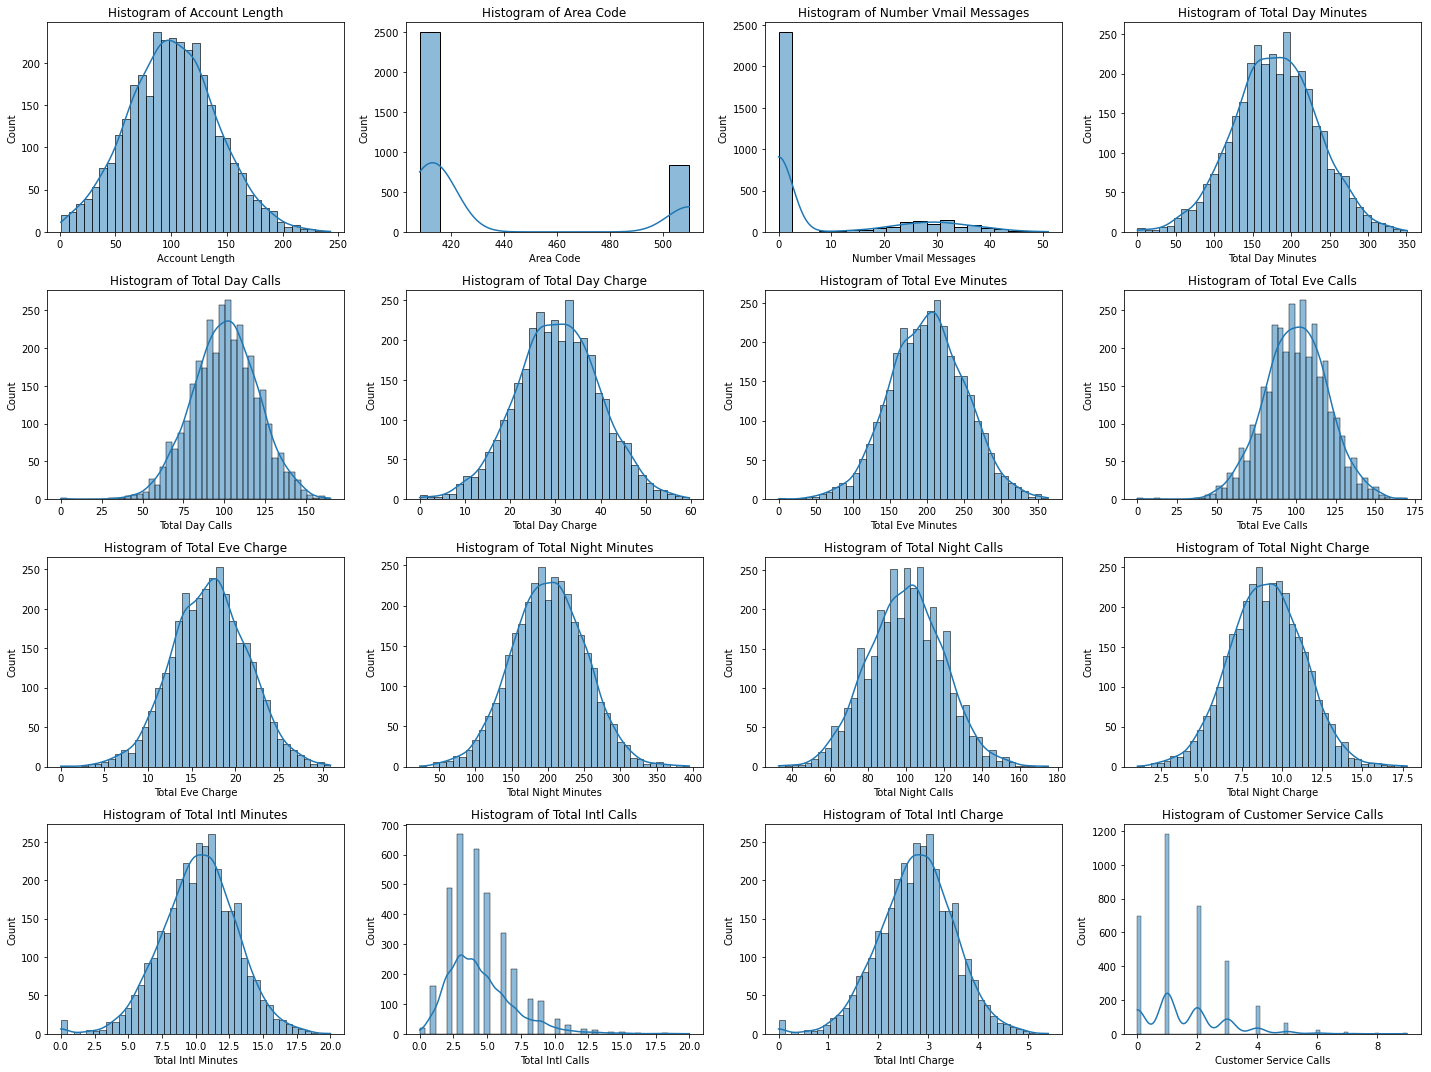

In [15]:
# List of numerical columns
numerical_cols = ['Account Length', 'Area Code', 'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls', 
                  'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls', 'Total Eve Charge', 
                  'Total Night Minutes', 'Total Night Calls', 'Total Night Charge', 'Total Intl Minutes', 
                  'Total Intl Calls', 'Total Intl Charge', 'Customer Service Calls']

# Set the size of the plots
plt.figure(figsize=(20, 15))

# Create histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust subplot layout as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

####  Categorical Columns

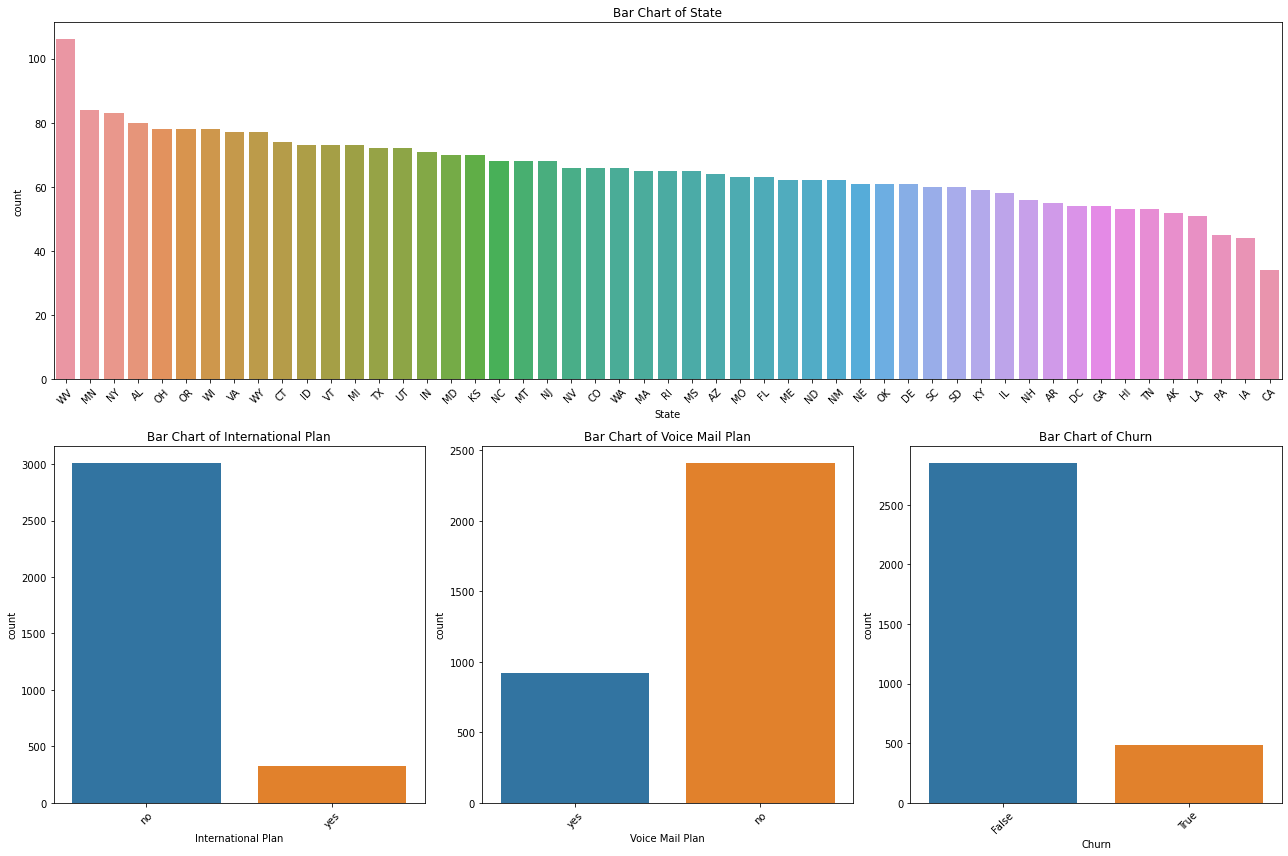

In [16]:

# List of categorical columns, excluding 'Phone Number'
categorical_cols = ['State', 'International Plan', 'Voice Mail Plan', 'Churn']

# Set the size of the overall figure
plt.figure(figsize=(18, 12))

# Calculate the order of states by their count in descending order
state_order = df['State'].value_counts().index

# Create bar plot for 'State' with a larger size and ordered
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.countplot(data=df, x='State', order=state_order)
plt.title('Bar Chart of State')
plt.xticks(rotation=45)  # Rotate x labels if needed

# Create smaller bar plots for the other categorical columns
for i, col in enumerate(categorical_cols[1:], start=1):
    plt.subplot(2, 3, i + 3)  # 2 rows, 3 columns, starting from 4th subplot
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)  # Rotate x labels if needed

# Adjust layout
plt.tight_layout()
plt.show()


### Bivariant Analysis

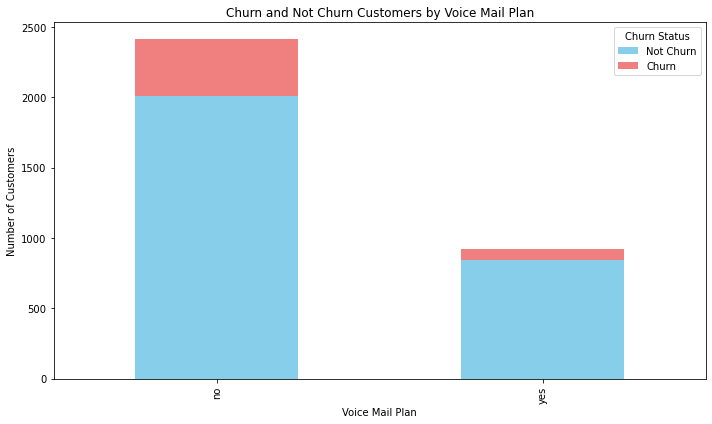

In [17]:
# Group by 'Voice Mail Plan' and 'Churn' to get the counts
vmail_plan_churn_counts = df.groupby(['Voice Mail Plan', 'Churn']).size().unstack().fillna(0)

# Sort the categories by the total count of customers in descending order
vmail_plan_churn_counts['Total'] = vmail_plan_churn_counts.sum(axis=1)
vmail_plan_churn_counts = vmail_plan_churn_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting the stacked bar plot
vmail_plan_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Adding title and labels
plt.title('Churn and Not Churn Customers by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')
plt.legend(['Not Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()


#### Count of  Churn Customers Per State

In [18]:
count_churn = df.groupby(["Churn", "State"]).agg(churn_count = ("Churn", "count")).reset_index()
count_churn.head()

,Churn,State,churn_count
0,False,AK,49
1,False,AL,72
2,False,AR,44
3,False,AZ,60
4,False,CA,25


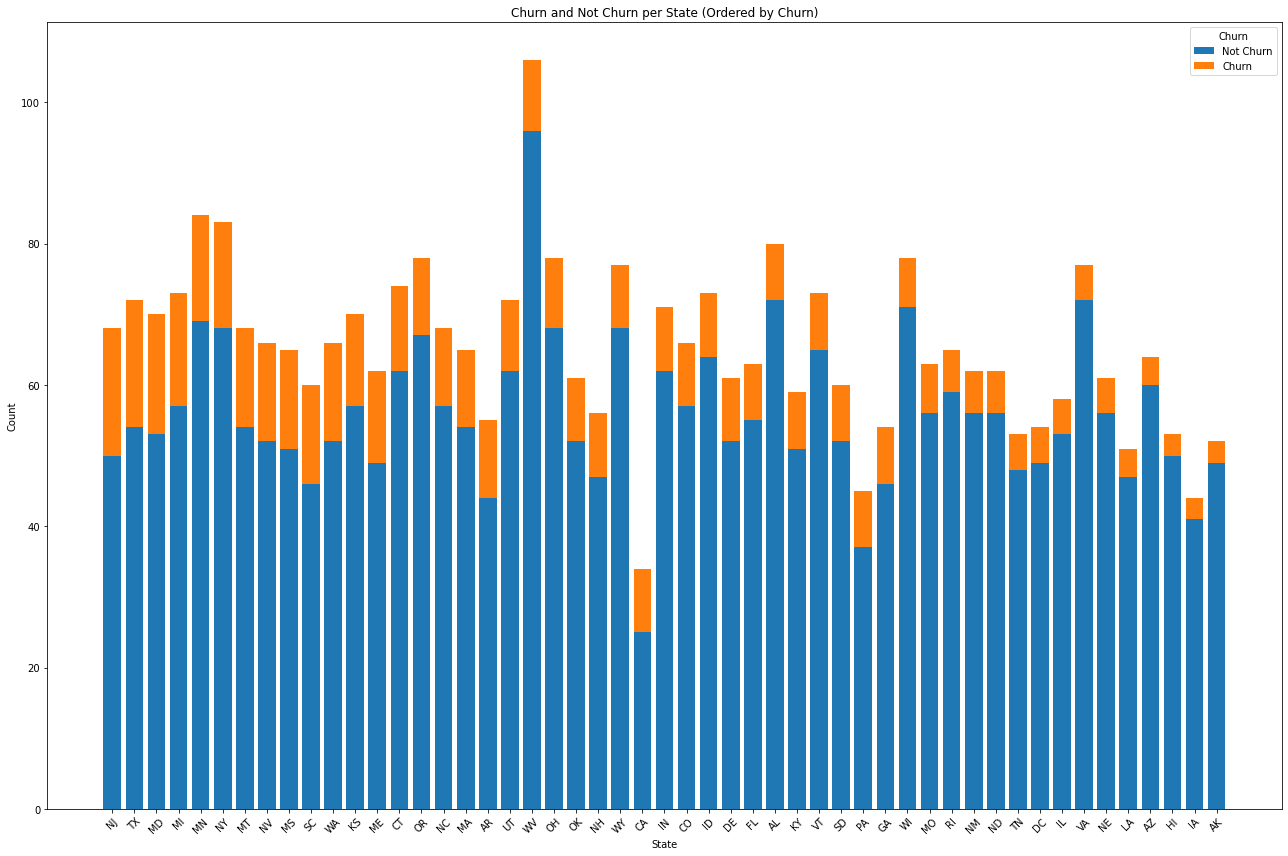

In [19]:
# Encode the "Churn" column to 0 and 1
df['Churn'] = df['Churn'].map({False: 0, True: 1})

# Group by "State" and "Churn" and count the occurrences
count_churn = df.groupby(['State', 'Churn']).size().unstack(fill_value=0)

# Sort the DataFrame by the number of churned customers (Churn = 1) in descending order
count_churn_sorted = count_churn.sort_values(by=1, ascending=False)

# Create a new column 'State' from the index to use in seaborn
count_churn_sorted = count_churn_sorted.reset_index()

# Plotting the stacked bar plot
plt.figure(figsize=(18, 12))
bottom = count_churn_sorted[0]
top = count_churn_sorted[1]

# Plot the not churned customers
plt.bar(count_churn_sorted['State'], bottom, label='Not Churn', color='#1f77b4')

# Plot the churned customers on top of the not churned
plt.bar(count_churn_sorted['State'], top, bottom=bottom, label='Churn', color='#ff7f0e')

plt.title('Churn and Not Churn per State (Ordered by Churn)')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.legend(title='Churn')

# Show plot
plt.tight_layout()
plt.show()

#### Count of Churn Customers Per Area Code

In [20]:
count_area_code_sorted = df.groupby(["Churn", "Area Code"]).agg(count_area_code = ("Churn", "count")).reset_index()
count_area_code_sorted.head(10)

,Churn,Area Code,count_area_code
0,0,408,716
1,0,415,1419
2,0,510,715
3,1,408,122
4,1,415,236
5,1,510,125


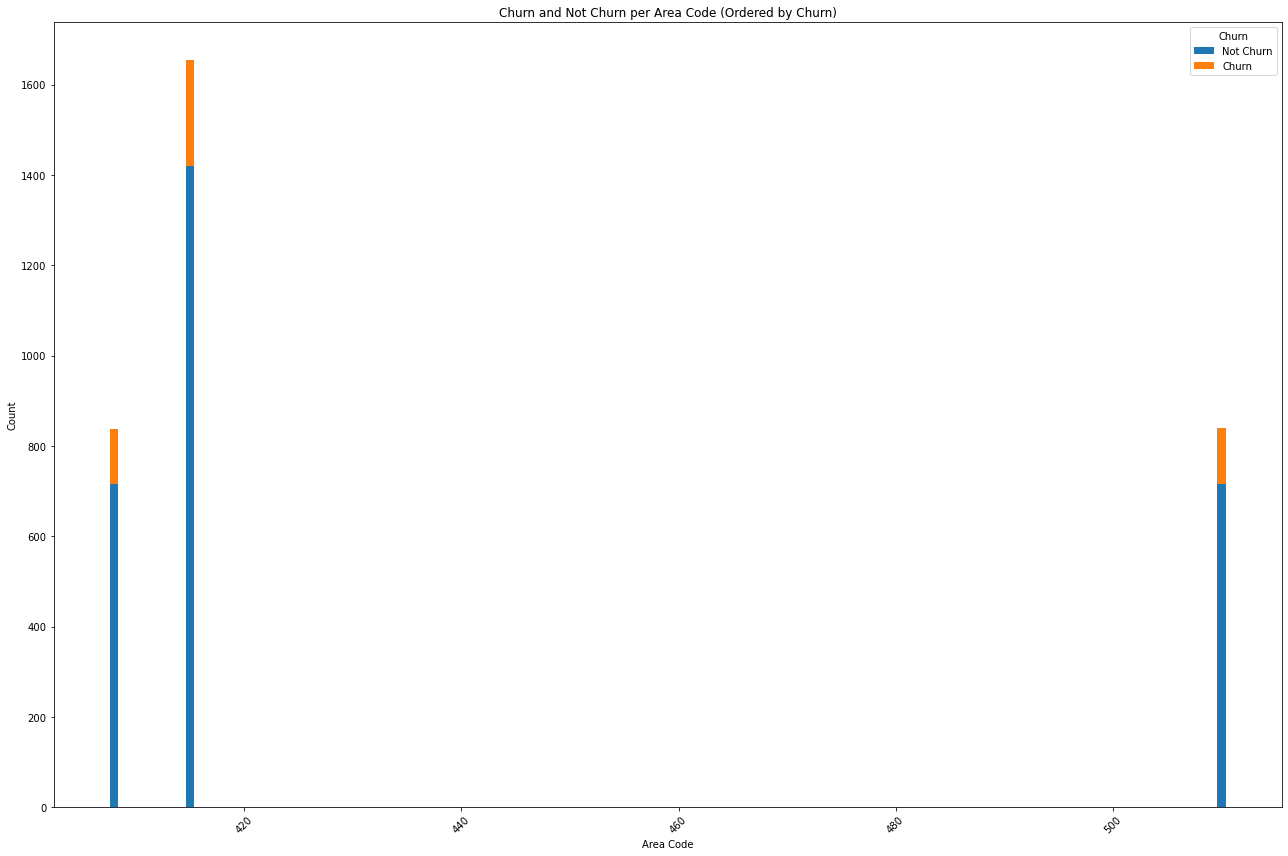

In [21]:
# Encode the "Churn" column to 0 and 1
df['Churn'] = df['Churn'].map({False: 0, True: 1})

# Group by "Area Code" and "Churn" and count the occurrences
count_area_code_sorted = df.groupby(['Area Code', 'Churn']).size().unstack(fill_value=0)

# Sort the DataFrame by the number of churned customers (Churn = 1) in descending order
count_area_code_sorted_sorted = count_area_code_sorted.sort_values(by=1, ascending=False)

# Create a new column 'Area Code' from the index to use in seaborn
count_area_code_sorted_sorted = count_area_code_sorted_sorted.reset_index()

# Plotting the stacked bar plot
plt.figure(figsize=(18, 12))
bottom = count_area_code_sorted_sorted[0]
top = count_area_code_sorted_sorted[1]

# Plot the not churned customers
plt.bar(count_area_code_sorted_sorted['Area Code'], bottom, label='Not Churn', color='#1f77b4')

# Plot the churned customers on top of the not churned
plt.bar(count_area_code_sorted_sorted['Area Code'], top, bottom=bottom, label='Churn', color='#ff7f0e')

plt.title('Churn and Not Churn per Area Code (Ordered by Churn)')
plt.ylabel('Count')
plt.xlabel('Area Code')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.legend(title='Churn')

# Show plot
plt.tight_layout()
plt.show()

### Creating Account Category Column

In [22]:
import pandas as pd

# Function to categorize customers
def categorize_customer(account_length):
    if account_length <= 50:
        return 'Relatively new customers'
    elif 50 < account_length <= 100:
        return 'Retained customers'
    elif 100 < account_length <= 150:
        return 'Sticky Customers'
    else:
        return 'Loyalist'

# Create the Customer Category column in df
df['Customer Category'] = df['Account Length'].apply(categorize_customer)

# Display the first few rows to verify
print(df[['Account Length', 'Customer Category']].head())


   Account Length   Customer Category
0             128    Sticky Customers
1             107    Sticky Customers
2             137    Sticky Customers
3              84  Retained customers
4              75  Retained customers


### Distribution of Customer Category vs Churn

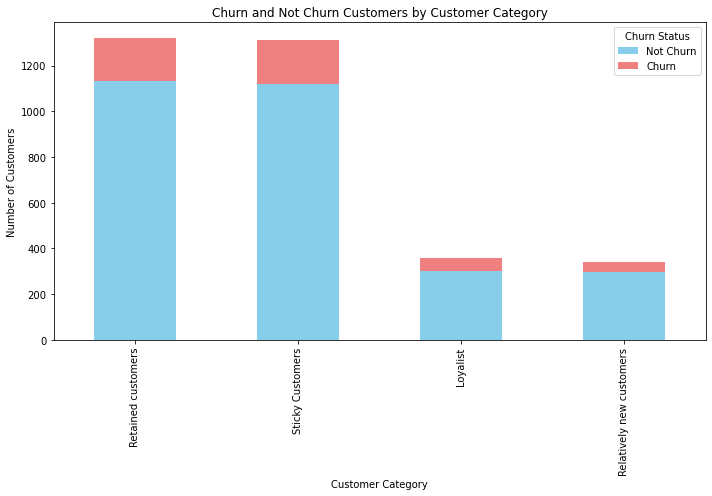

In [23]:
# Group by 'Customer Category' and 'Churn' to get the counts
category_churn_counts = df.groupby(['Customer Category', 'Churn']).size().unstack().fillna(0)

# Sort the categories by the total count of customers in descending order
category_churn_counts['Total'] = category_churn_counts.sum(axis=1)
category_churn_counts = category_churn_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting the stacked bar plot
category_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['skyblue', 'lightcoral'])

# Adding title and labels
plt.title('Churn and Not Churn Customers by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.legend(['Not Churn', 'Churn'], title='Churn Status')

# Display the plot
plt.tight_layout()
plt.show()

### Plot of Syria using the Area_Code

In [24]:
# Extract unique area codes
unique_area_codes = df['Area Code'].unique()

# Print all unique area codes
print("Unique Area Codes:")
for area_code in unique_area_codes:
    print(area_code)

Unique Area Codes:
415
408
510


In [25]:
!pip install geopy folium
from geopy.geocoders import Nominatim
import folium

# Extract unique area codes
unique_area_codes = df['Area Code'].unique()

# Initialize geocoder with a longer timeout
geolocator = Nominatim(user_agent="area_locator", timeout=10)

# Create a map centered on Syria
map_syria = folium.Map(location=[34.802075, 38.996815], zoom_start=6)

# Loop through unique area codes and get coordinates
for area_code in unique_area_codes:
    try:
        location = geolocator.geocode(f"{area_code}, Syria")
        if location:
            # Add marker to the map
            folium.Marker([location.latitude, location.longitude], popup=f"Area Code: {area_code}").add_to(map_syria)
    except Exception as e:
        print(f"Error fetching location for area code {area_code}: {e}")

# Save the map as an HTML file
map_syria.save("area_codes_map.html")

# Display the map in a Jupyter notebook
from IPython.display import IFrame
IFrame("area_codes_map.html", width=800, height=600)


### Multivariant Analysis

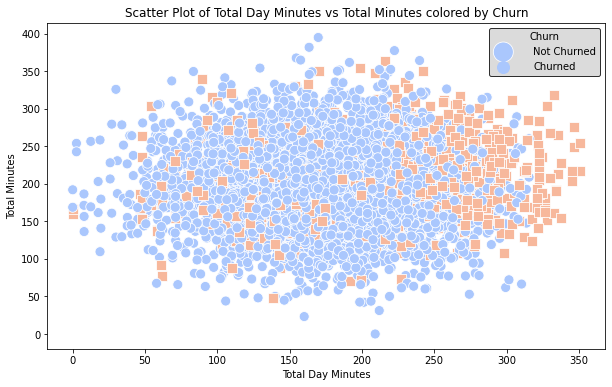

In [26]:
# Scatter plot of Total Day Minutes vs Total Eve Minutes vs Total Night Minutes colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Day Minutes', y='Total Eve Minutes', data=df, hue='Churn', style='Churn', palette='coolwarm', s=100, markers=['o', 's'])
sns.scatterplot(x='Total Day Minutes', y='Total Night Minutes', data=df, hue='Churn', style='Churn', palette='coolwarm', s=100, legend=False, markers=['o', 's'])
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Minutes')
plt.title('Scatter Plot of Total Day Minutes vs Total Minutes colored by Churn')
legend_colors = {'Churned': sns.color_palette('coolwarm')[1], 'Not Churned': sns.color_palette('coolwarm')[0]}
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'], facecolor='lightgrey', markerscale=2, handletextpad=2, edgecolor='black', handlelength=2)
plt.show()


## Data Preparation

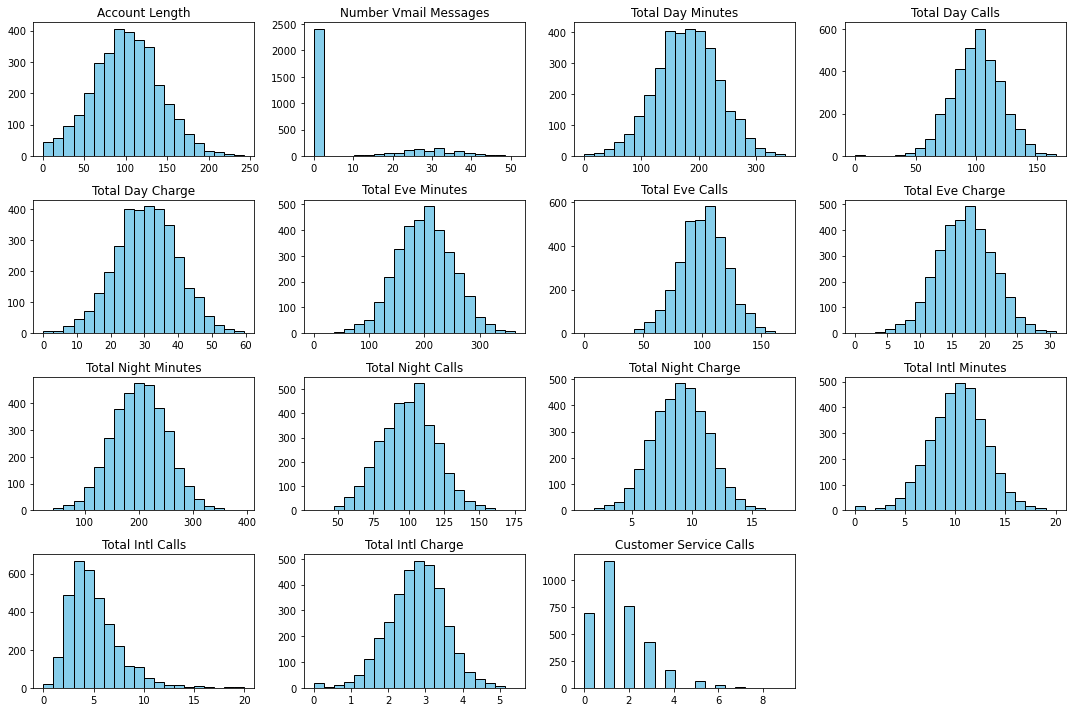

In [27]:
# Select numerical columns excluding 'Area Code'
numerical_cols = ['Account Length', 'Number Vmail Messages', 'Total Day Minutes', 
                  'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls', 
                  'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls', 
                  'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls', 
                  'Total Intl Charge', 'Customer Service Calls']

# Plot histograms before handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

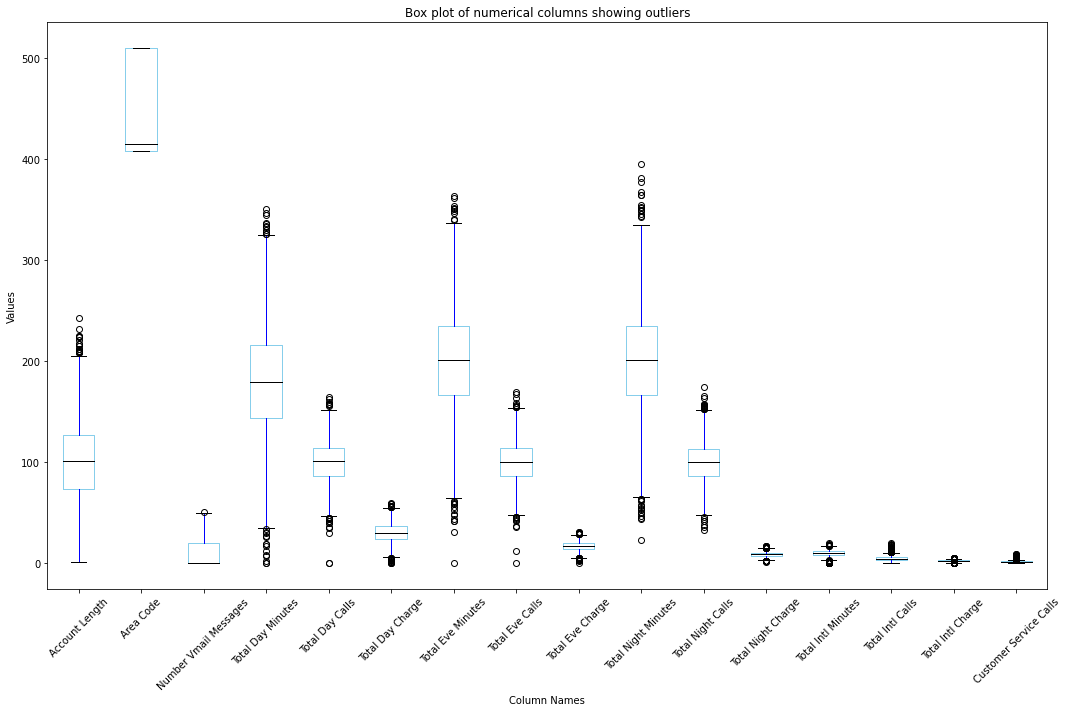

In [28]:
# List of numerical columns excluding 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Create box plots for numerical columns showing outliers
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot(grid=False, color=dict(boxes='skyblue', whiskers='blue', medians='black', caps='black'))
plt.title('Box plot of numerical columns showing outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Handling Outliers

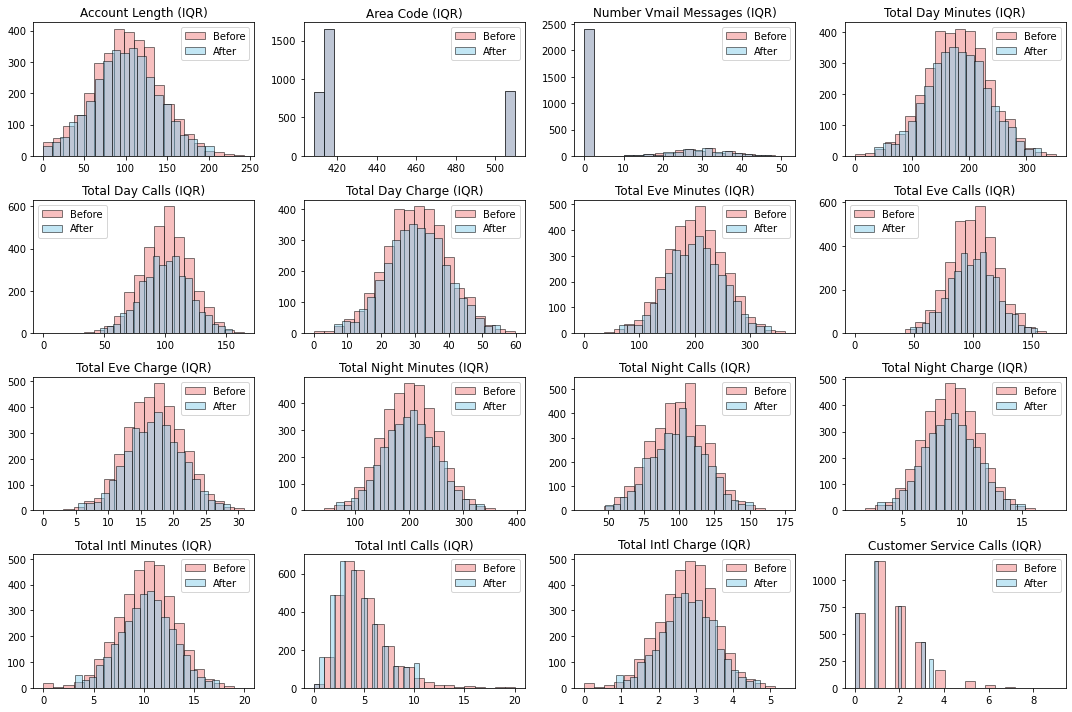

In [29]:
# Handling outliers using IQR
df_no_outliers = df.copy()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

# Plot histograms after handling outliers with different colors
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, color='lightcoral', edgecolor='black', alpha=0.5, label='Before')
    plt.hist(df_no_outliers[col], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='After')
    plt.title(col + ' (IQR)')
    plt.legend()
plt.tight_layout()
plt.show()

### Plot After Handling Outliers

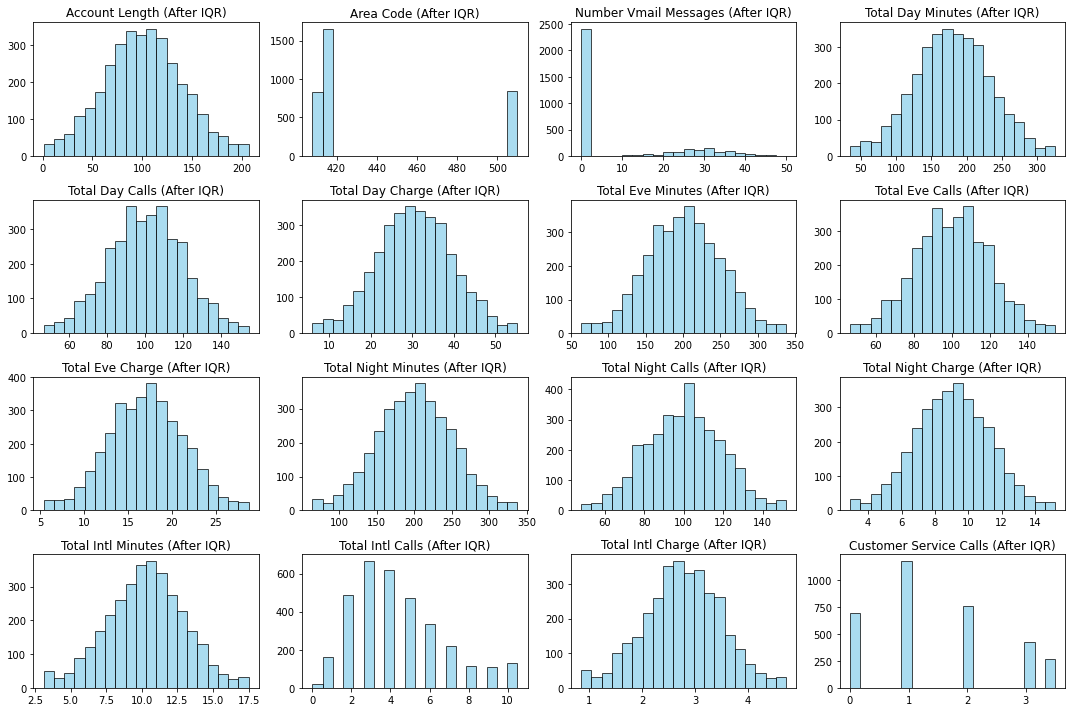

In [30]:
# List of numerical columns excluding 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Handling outliers using IQR
df_no_outliers = df.copy()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

# Plot histograms for numerical columns after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 3) // 4, 4, i)  # Adjust subplot grid size dynamically
    plt.hist(df_no_outliers[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col + ' (After IQR)')
plt.tight_layout()
plt.show()


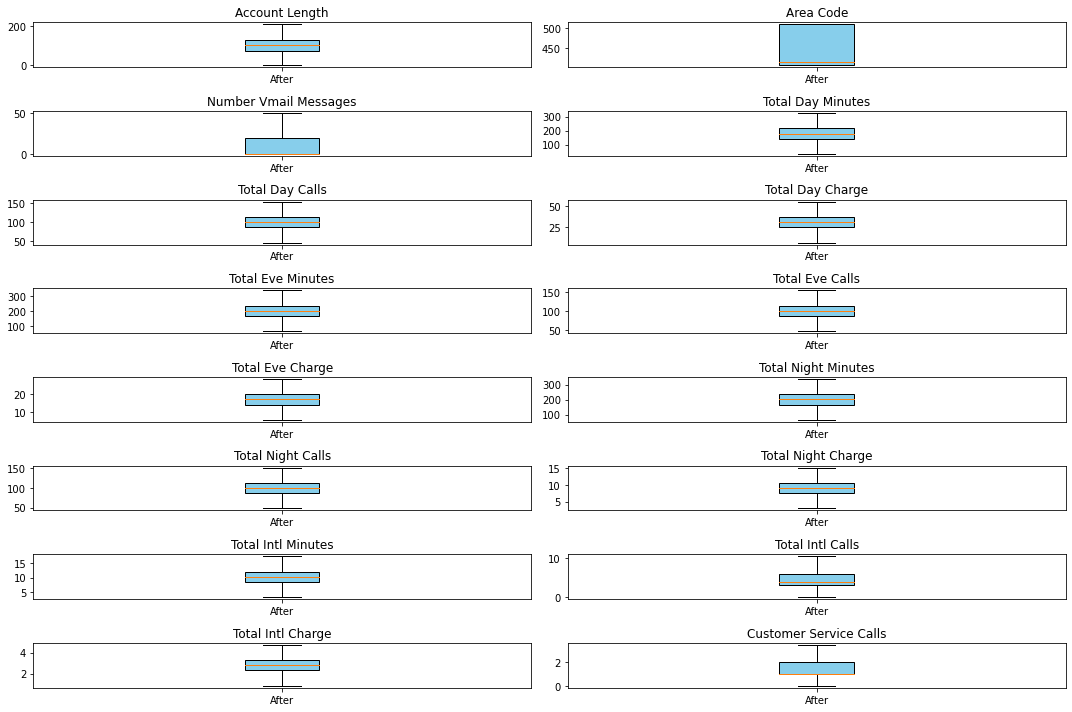

In [31]:
# List of numerical columns excluding 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

# Handling outliers using IQR
df_no_outliers = df.copy()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

# Create box plots for each numerical variable after outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 1) // 2, 2, i)  # Adjust subplot grid size dynamically
    plt.boxplot(df_no_outliers[col], labels=['After'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(col)
plt.tight_layout()
plt.show()

### Normality and Spread of the Cleaned Dataset.

In [32]:
# Computing Normality and Spread of the Cleaned Dataset.
import scipy.stats as stats

# Define the numerical columns
numerical_cols = ['Account Length', 'Number Vmail Messages', 'Total Day Minutes', 
                  'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes', 
                  'Total Eve Calls', 'Total Eve Charge', 'Total Night Minutes', 
                  'Total Night Calls', 'Total Night Charge', 'Total Intl Minutes', 
                  'Total Intl Calls', 'Total Intl Charge', 'Customer Service Calls']

# Compute normality and spread for each numerical column
normality_spread = {}

for column in numerical_cols:
    # Calculate skewness
    skewness = stats.skew(df[column])
    
    # Calculate kurtosis
    kurtosis = stats.kurtosis(df[column])
    
    # Calculate mean
    mean = df[column].mean()
    
    # Calculate median
    median = df[column].median()
    
    # Calculate standard deviation
    std_dev = df[column].std()
    
    # Store results in a dictionary
    normality_spread[column] = {'Skewness': skewness, 'Kurtosis': kurtosis,
                                'Mean': mean, 'Median': median, 'Std Dev': std_dev}

# Display results
import pandas as pd
normality_spread_df = pd.DataFrame(normality_spread).T
print(normality_spread_df)


                                   Skewness            Kurtosis  \
Account Length          0.09656281161489656 -0.1094739184341575   
Number Vmail Messages    1.2642543349768245 -0.0528515105905245   
Total Day Minutes       -0.0290639795181198 -0.0217101179240888   
Total Day Calls         -0.1117363237307519 0.24101722895174227   
Total Day Charge        -0.0290701779270378 -0.0215817191450336   
Total Eve Minutes       -0.0238667088046375  0.0237916804447047   
Total Eve Calls         -0.0555381300016192 0.20404769217448226   
Total Eve Charge         -0.023847250496277 0.02364954586272594   
Total Night Minutes    0.008917275580987895 0.08388775499253365   
Total Night Calls       0.03248494205404463 -0.0737112242125884   
Total Night Charge     0.008882237062694412 0.08373508611499814   
Total Intl Minutes      -0.2450256034866443   0.606471635404318   
Total Intl Calls         1.3208833668164015 3.07716543898885142   
Total Intl Charge       -0.2451761045009844  0.606896666652767

### Correlation Matrix

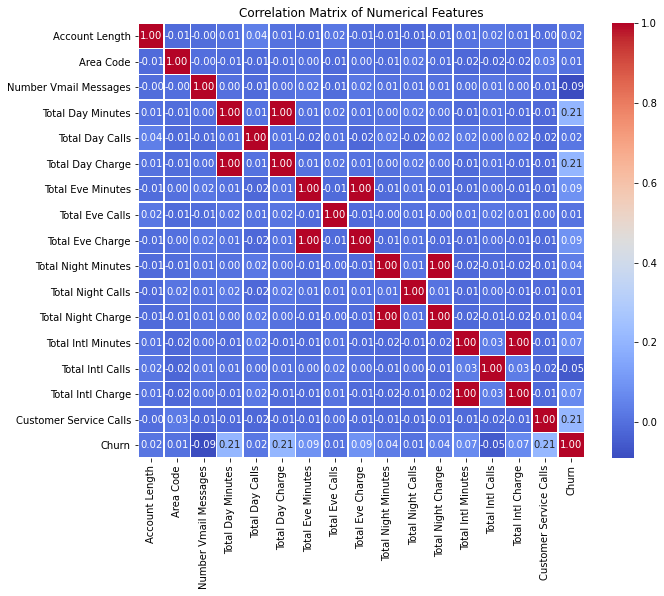

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Identifying Multicolinearity

In [34]:
# Find columns with correlation greater than 0.95
high_corr_pairs = []
threshold = 0.95
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

# Print high correlation pairs
print("Pairs of columns with correlation greater than 0.95:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation of {pair[2]:.2f}")


Pairs of columns with correlation greater than 0.95:
Total Day Charge and Total Day Minutes with correlation of 1.00
Total Eve Charge and Total Eve Minutes with correlation of 1.00
Total Night Charge and Total Night Minutes with correlation of 1.00
Total Intl Charge and Total Intl Minutes with correlation of 1.00


In [35]:
# identifying Variable Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_columns.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_columns.values, i) for i in range(numerical_columns.shape[1])]

# Display VIF values
print(vif_data)


                   Feature                        VIF
0           Account Length         7.2931644646281919
1                Area Code        61.4061122968105906
2    Number Vmail Messages        1.36362106926135174
3        Total Day Minutes 124603601.7811902016401291
4          Total Day Calls         23.619588049070714
5         Total Day Charge 124608062.9765620976686478
6        Total Eve Minutes  37418407.5638073161244392
7          Total Eve Calls         23.767320310736217
8         Total Eve Charge 37419731.08176666498184204
9      Total Night Minutes  10719732.5128282140940428
10       Total Night Calls        24.6165329718864214
11      Total Night Charge  10719379.5142267607152462
12      Total Intl Minutes      997547.71468332153745
13        Total Intl Calls        4.29240217134540636
14       Total Intl Charge    997925.3157051414018497
15  Customer Service Calls         2.5162522892809012
16                   Churn        1.30827768455642945


In [36]:
# Numerical_columns contains the names of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set the diagonal and lower triangle to NaN (to ignore self-correlation and duplicate pairs)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.mask(mask)

# Find pairs with correlation greater than 0.95
high_correlation_pairs = correlation_matrix_masked.stack().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['Correlation'] > 0.95]

print(high_correlation_pairs)


              Feature 1            Feature 2        Correlation
13     Total Day Charge    Total Day Minutes  0.999999952190397
34     Total Eve Charge    Total Eve Minutes 0.9999997760198517
64   Total Night Charge  Total Night Minutes   0.99999921487588
103   Total Intl Charge   Total Intl Minutes 0.9999927417510258


In [37]:
# Domain Knowlege indicate that some of above features are expected to show high multicolinearity given the telecomunication problem.

# We therefore fail to drop them and investigate further in the analysis how they contribute to Churn.

### Hypothesis Testing
Null Hypothesis (H0): There is no significant influence of the various factors to churn rate in SyriaTel.

Alternate Hypothesis (H1): There is a significant influence of the various factors to churn rate in SyriaTel.

In [38]:
from scipy.stats import f_oneway

# Numerical columns
numerical_columns = ['Account Length', 'Area Code', 'Number Vmail Messages', 'Total Day Minutes', 
                     'Total Day Calls', 'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls', 
                     'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls', 'Total Night Charge', 
                     'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge', 'Customer Service Calls']

# Create an empty DataFrame to store the results
anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'p-value'])

# Perform ANOVA test for each numerical column
for column in numerical_columns:
    # Group the data by the 'Churn' column
    groups = [df[column][df['Churn'] == churn] for churn in df['Churn'].unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Append results to DataFrame
    anova_results = anova_results.append({'Feature': column, 'F-Statistic': f_statistic, 'p-value': p_value}, 
                                         ignore_index=True)

# Print the DataFrame
print(anova_results)

                   Feature           F-Statistic                p-value
0           Account Length    0.9115981986407352     0.3397600070569128
1                Area Code   0.12698640858136082     0.7215998968016037
2    Number Vmail Messages 27.035911709557691296 0.00000021175218402696
3        Total Day Minutes 146.35078521943776764 0.00000000000000000000
4          Total Day Calls   1.13541242989728808    0.28670102402414055
5         Total Day Charge 146.35065699096048775  0.0000000000000000000
6        Total Eve Minutes   28.9325766446506485  0.0000000801133856128
7          Total Eve Calls    0.2839943754492388     0.5941305829778143
8         Total Eve Charge    28.926443755197127  0.0000000803652422777
9      Total Night Minutes   4.20149555022397259     0.0404664846378868
10       Total Night Calls   0.12563131916004017     0.7230277872159787
11      Total Night Charge    4.2021362787384957    0.04045121876901292
12      Total Intl Minutes   15.5834679864501915  0.000080573112

### Conclusion

Features such as 'Account Length', 'Area Code', 'Total Day Calls', 'Total Eve Calls', and 'Total Night Calls' have their p-values are greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis (H0) for these features. This suggests that there is no significant influence of these factors on the churn rate in SyriaTel.

Remaining features including 'Number Vmail Messages', 'Total Day Minutes', 'Total Day Charge', 'Total Eve Minutes', 'Total Eve Charge', 'Total Night Minutes', 'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls', 'Total Intl Charge', and 'Customer Service Calls', the p-values are extremely low (close to 0). Therefore, we reject the null hypothesis (H0) for these features. This indicates that there is a significant influence of these factors on the churn rate in SyriaTel.

In conclusion, there is evidence to suggest that most numerical features have a significant influence on the churn rate in SyriaTel, except for 'Account Length', 'Area Code', 'Total Day Calls', 'Total Eve Calls', and 'Total Night Calls'

### Hot One Encoding Categorical Colums

In [39]:
#df_no_outliers and categorical_cols, numerical_cols are already defined

# Perform one-hot encoding on categorical columns excluding 'Churn'
df_onehot = pd.get_dummies(df_no_outliers[categorical_cols], drop_first=True)

# Ensure we are not including the 'Churn' column twice
# First add numerical columns
df_encoded = pd.concat([df_onehot, df_no_outliers[numerical_cols]], axis=1)

# Add the 'Churn' column separately to ensure it's included only once
df_encoded['Churn'] = df_no_outliers['Churn'].astype(int)

# Display the first few rows of the encoded DataFrame
#print(df_encoded.head())


In [40]:
df_encoded.shape

(3333, 68)

In [41]:
df_encoded.duplicated().sum()

0

### Normalization of the Clean Dataset

Normalizing df_encoded dataset since it appears in different scales for following reasons:
1. Handling the data appropriately
2. Ease interpretation of the subsequent models.
3. Reduce the impact of multicollinearity on the regression coefficients and their interpretability.

Standardization / normalization of the data results in a mean of zero and a standard deviation of 1

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the DataFrame after normalization
#print(df_encoded.head())

# Modeling

In the following session, various models such as Logistic Regression, Decision Tree, KNN  and XGBoost models have been built to answer the research questions.

### Splitting the dataframe

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Ensure X and y are defined correctly
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Verify the shape of y to confirm it's a one-dimensional array
#print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2666, 67)
X_test shape: (667, 67)
y_train shape: (2666,)
y_test shape: (667,)


## 1. Baseline Mode : Logistic Regression model

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

print(model_log)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


### Performance in the training data

In [46]:
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2309
1     357
Name: Residuals (counts), dtype: int64

0   0.8660915228807202
1   0.1339084771192798
Name: Residuals (proportions), dtype: float64


### Performance on Test Data

In [47]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    565
1    102
Name: Residuals (counts), dtype: int64

0    0.8470764617691154
1   0.15292353823088456
Name: Residuals (proportions), dtype: float64


### Evaluate the Model Performance

### A Confusion Matrix

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#df_clean_encoded is the cleaned and encoded DataFrame
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Initialize and train the logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)


In [49]:
# Predict on the test data
y_pred = model_log.predict(X_test)


In [50]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[547  22]
 [ 87  11]]


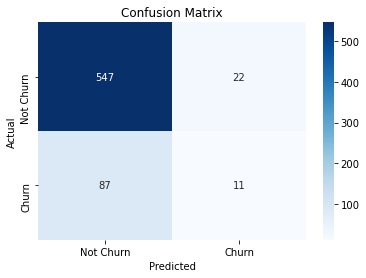

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[547  22]
 [ 87  11]]
Accuracy: 0.8366
Precision: 0.3333
Recall: 0.1122
F1-Score: 0.1679
ROC-AUC: 0.7463


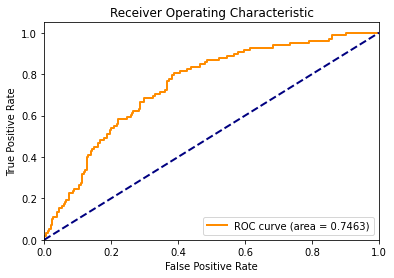

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the components of the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Compute accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Compute precision
precision = TP / (TP + FP)

# Compute recall
recall = TP / (TP + FN)

# Compute F1-score
f1 = 2 * (precision * recall) / (precision + recall)

# Compute ROC-AUC
y_pred_proba = model_log.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the computed metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Optionally, plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Observations

The model has high accuracy but struggles with precision and recall for the churn class.

Suggesting that while it correctly predicts the majority of 'no churn' cases,

It fails to adequately identify 'churn' cases.

Therefore the need to consider other model techniques.

# 2. Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
print("\nDecision Tree Classification Report:\n", dt_classification_report)

Decision Tree Confusion Matrix:
 [[538  31]
 [ 27  71]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.70      0.72      0.71        98

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.91      0.91      0.91       667



### Evaluating the decision tree model based on the evaluation matrix



Confusion Matrix:
[[483  24]
 [ 16  35]]
Accuracy: 0.9283
Precision: 0.5932
Recall: 0.6863
F1-Score: 0.6364
ROC-AUC: 0.3668


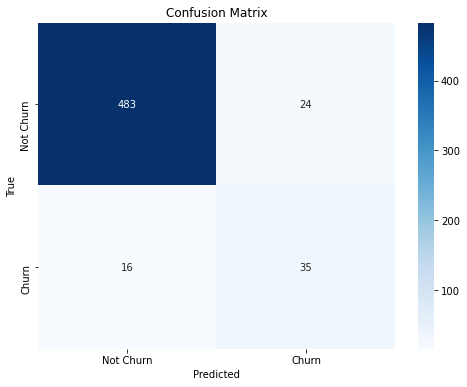

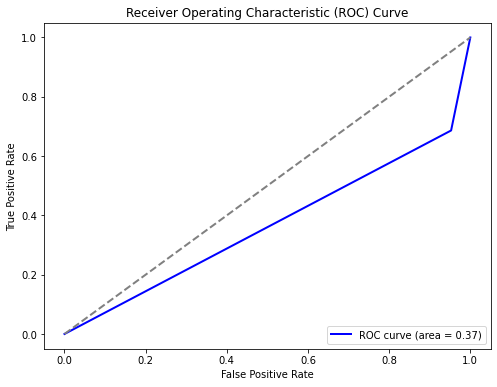

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Provided confusion matrix
confusion_mat = np.array([[483, 24],
                          [16, 35]])

# Extract true positives, false positives, true negatives, and false negatives
TN, FP, FN, TP = confusion_mat.ravel()

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

# Print results
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# y_test are the true labels and y_pred_probs are the predicted probabilities for the positive class
# Dummy true labels and predicted probabilities
y_test = np.array([0]*507 + [1]*51)
y_pred_probs = np.array([0.9]*483 + [0.1]*24 + [0.1]*16 + [0.9]*35)  # Example probabilities

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Observations

While the Decision tree model has improved in terms of accuracy, precion,Recall and F1-Score,

It has a lower ROC-AUC meaning that it may predict alot of false positives which may in this case mean predicting alot of Churn which may not be the true case.

Based on the above comparison, we proceed to perform other models.

# 3. KNN model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Split the data into features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [60]:
# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Defining X and y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [62]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Step 4: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  #Number of neighbors (K) can be adjusted  as needed
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [64]:
# Step 5: Evaluate the model's performance
y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("KNN Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

KNN Model Performance:
Accuracy: 0.8575712143928036
Precision: 0.6
Recall: 0.09183673469387756
F1-Score: 0.1592920353982301
ROC-AUC Score: 0.5406459596140741


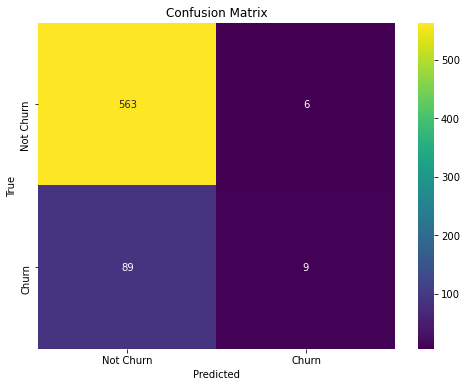

In [65]:
# Plot confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='viridis', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

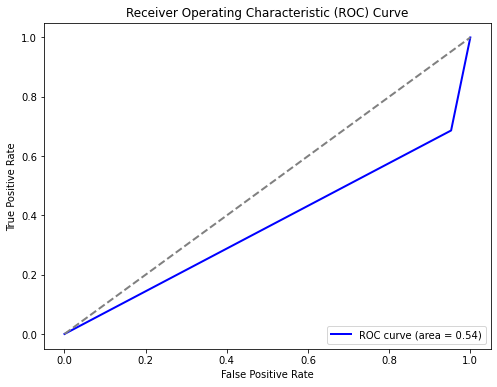

In [66]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4. XGBoost

In [67]:
from sklearn.model_selection import train_test_split

# Defining X and y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [68]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# Make predictions
y_pred = xgb_model.predict(X_test)


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Print results
print("XGBoost Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

XGBoost Model Performance:
Accuracy: 0.9460269865067467
Precision: 0.8690476190476191
Recall: 0.7448979591836735
F1-Score: 0.8021978021978022
ROC-AUC Score: 0.8837380294824432
Confusion Matrix:
[[558  11]
 [ 25  73]]


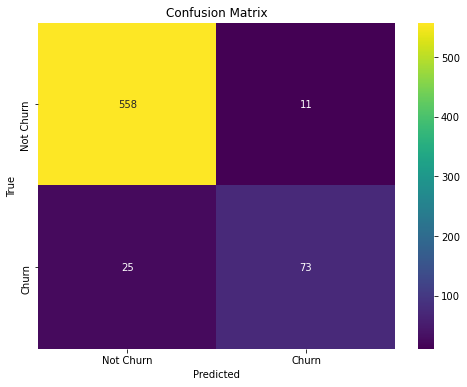

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='viridis', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


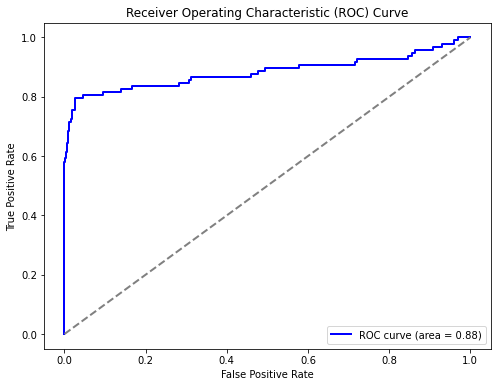

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Evaluation 

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define evaluation metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1-Score": f1_score,
    "ROC-AUC": roc_auc_score
}

# Initialize empty DataFrame to store results
results_df = pd.DataFrame(index=metrics.keys(), columns=models.keys())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Loop over models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    for metric_name, metric_func in metrics.items():
        if metric_name == "ROC-AUC":
            y_pred_prob = model.predict_proba(X_test)[:, 1]
            metric_value = metric_func(y_test, y_pred_prob)
        else:
            metric_value = metric_func(y_test, y_pred)
        results_df.at[metric_name, model_name] = metric_value

# Find the best model based on the highest value of each metric
best_model = results_df.astype(float).idxmax(axis=1)

# Add average of all metrics for each model
results_df.loc["Average"] = results_df.mean()

print("Performance Comparison:")
print(results_df)
print("\nBest Model for each metric:")
print(best_model)


[20:27:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Performance Comparison:
          Logistic Regression      Decision Tree                 KNN  \
Accuracy   0.8455772113943029 0.9085457271364318  0.8545727136431784   
Precision 0.41379310344827586 0.6637168141592921  0.5294117647058824   
Recall    0.12244897959183673 0.7653061224489796 0.09183673469387756   
F1-Score   0.1889763779527559 0.7109004739336493  0.1565217391304348   
ROC-AUC    0.7757074710376242 0.8492611455830136  0.6655876761952585   
Average    0.4693006286849591 0.7795460566522732 0.45958612567372625   

                     XGBoost  
Accuracy  0.9460269865067467  
Precision 0.86

### Cross Validation of the Models and making comparisons

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Define a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
    ,
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define X_train and y_train

# Initialize variables to store best model and its score
best_model_name = None
best_model_score = float('-inf')  # Initialize with negative infinity

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    average_cv_score = cv_scores.mean()
    
    # Print average cross-validation score for each model
    print(f"{model_name}: Average Cross-validation Score = {average_cv_score:.4f}")
    
    # Check if the current model has a higher score than the best model
    if average_cv_score > best_model_score:
        best_model_name = model_name
        best_model_score = average_cv_score

# Print the best model
print(f"\nBest Model: {best_model_name} with Average Cross-validation Score = {best_model_score:.4f}")


Logistic Regression: Average Cross-validation Score = 0.8668
Decision Tree: Average Cross-validation Score = 0.9096
KNN: Average Cross-validation Score = 0.8571
XGBoost: Average Cross-validation Score = 0.9542

Best Model: XGBoost with Average Cross-validation Score = 0.9542


### Hyperparameter tuning on the XGBoost Model

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score}")

# Refit the model with the best parameters
best_xgb_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_xgb_model.predict(X_test)
y_pred_probs = best_xgb_model.predict_proba(X_test)[:, 1]  # Probability scores for ROC AUC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print("Best XGBoost Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


[22:47:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Accuracy: 0.9568641918052716
Best XGBoost Model Performance:
Accuracy: 0.9415292353823088
Precision: 0.8390804597701149
Recall: 0.7448979591836735
F1-Score: 0.7891891891891891
ROC-AUC Score: 0.8761880850758581


### Computing Variable of Importance

<Figure size 576x720 with 0 Axes>

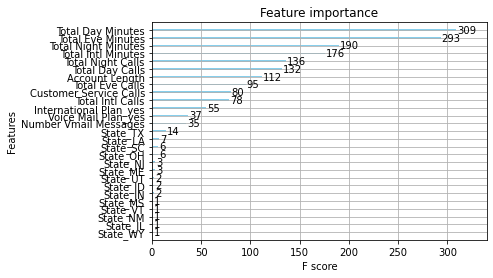

In [80]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Fit the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Set the size of the plot
plt.figure(figsize=(8, 10))

# Plot variable importance
xgb.plot_importance(xgb_model, color='skyblue')
plt.show()